In [1]:
include("cutoff.jl")

hitting_times (generic function with 1 method)

Taking Step 1 of 10 steps
Taking Step 2 of 10 steps
Taking Step 3 of 10 steps
Taking Step 4 of 10 steps
Taking Step 5 of 10 steps
Taking Step 6 of 10 steps
Taking Step 7 of 10 steps
Taking Step 8 of 10 steps
Taking Step 9 of 10 steps
Taking Step 10 of 10 steps


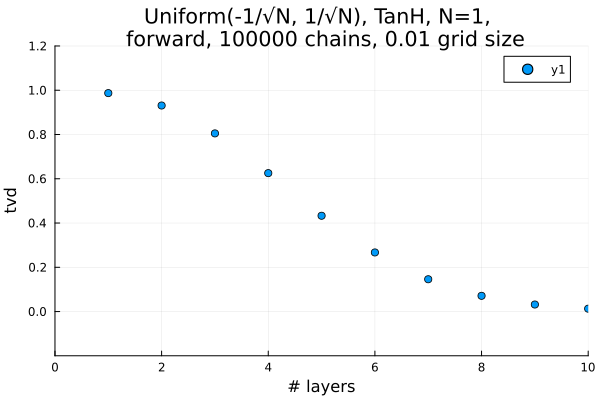

In [21]:
N = 1
X₀ = rand(Uniform(-1, 1), N)
num_chains = 100000
# Dist = Uniform(-1/√N, 1/√N)
Dist = Uniform(-1, 1)
# Dist = Normal(0.0, 1)
# Dist = Normal(0.0, 1/√N)
# activation = σ
activation = tanh
grid_size = 0.01
num_steps = 10
forward = true
store_steps = false

Exp = Experiment(X₀, N, num_chains, Dist, activation, grid_size, num_steps, forward, store_steps)
Results = ExperimentResults([], [], [])
run_and_plot_tvds(Exp, Results, verbose=true, save=false)

In [ ]:
grid_sizes = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]
p = plot()

for grid_size in grid_sizes
    println(grid_size)
    Exp = Experiment(X₀, N, num_chains, Dist, activation, grid_size, num_steps, forward, store_steps)

    run_chain(Exp, Results, verbose=false)
    diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)

    if activation == σ
        title = "$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_chains chains"
    elseif activation == tanh
        title = "$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_chains chains"
    end

    plot!(Results.tvds,
         title=title,
         xlabel="# layers",
         ylabel="tvd",
         xlim=(0, num_steps),
         ylim=(-0.2, 1.2),
         yticks = 0:0.2:1.2,
         seriestype=:scatter,
        label="$grid_size"
    )
end

display(p)

In [24]:
diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)

savefig(p, "imgs/tvds/$diststr_nongreek $actstr $dynamicsstr N=$N.png")

"/Users/bhushansuwal/Desktop/code/cutoff/imgs/tvds/Uniform(-sqrtN, sqrtN) TanH forward N=5.png"

In [22]:
Results.tvds[1]

0.9870300000000001